In [12]:
import pandas as pd
import os
import numpy as np

# 각 주식 시장의 CSV 파일을 읽는 함수
def read_stock_list(market):
    file_name = f"{market}_stock_list.csv"
    if os.path.exists(file_name):
        return pd.read_csv(file_name)
    else:
        print(f"{file_name} 파일이 존재하지 않습니다.")
        return None

# 주식 시장 목록
markets = ['NASDAQ', 'NYSE', 'AMEX', 'S&P 500']

# 각 시장의 데이터프레임을 동적으로 변수에 저장하기
for market in markets:
    stock_list_df = read_stock_list(market)
    if stock_list_df is not None:
        # S&P 500을 SP_500으로 변환
        market_name = market.replace(' ', '_').replace('S&P', 'SP')
        # 동적으로 변수 이름을 생성하여 저장
        globals()[f"{market_name}_list_df"] = stock_list_df
        print(f"{market} 종목 목록을 {market_name}_list_df로 저장했습니다.")
    else:
        print(f"{market} 시장의 CSV 파일을 읽을 수 없습니다.")

# 예시로 NASDAQ_list_df 출력하기
if 'NASDAQ_list_df' in globals():
    print("\nNASDAQ 종목 목록:")
    print(NASDAQ_list_df.head())  # 상위 5개 항목 출력

# 예시로 SP_500_list_df 출력하기
if 'SP_500_list_df' in globals():
    print("\nS&P 500 종목 목록:")
    print(SP_500_list_df.head())  # 상위 5개 항목 출력

# SP_500_list_df와 NASDAQ_list_df 세로로 합치기
combined_SP_NASDAQ_df = pd.concat([SP_500_list_df, NASDAQ_list_df], ignore_index=True)

# Symbol 기준으로 중복 제거 (Sector 값이 NaN이 아닌 행을 유지)
combined_SP_NASDAQ_df = combined_SP_NASDAQ_df[combined_SP_NASDAQ_df['Sector'].notna() | ~combined_SP_NASDAQ_df.duplicated(subset='Symbol', keep=False)]

# 중복된 Symbol에 대해 첫 번째 나타난 값을 유지하고, 나머지는 삭제
combined_SP_NASDAQ_df = combined_SP_NASDAQ_df.drop_duplicates(subset='Symbol', keep='first')

combined_SP_NASDAQ_AMEX_list_df=pd.concat([combined_SP_NASDAQ_df, AMEX_list_df], ignore_index=True)
combined_SP_NASDAQ_AMEX_list_df=combined_SP_NASDAQ_AMEX_list_df[combined_SP_NASDAQ_AMEX_list_df['Sector'].notna() | ~combined_SP_NASDAQ_AMEX_list_df.duplicated(subset='Symbol', keep=False)]
combined_SP_NASDAQ_AMEX_list_df=combined_SP_NASDAQ_AMEX_list_df.drop_duplicates(subset='Symbol', keep='first')

all_list_df=pd.concat([combined_SP_NASDAQ_AMEX_list_df, NYSE_list_df], ignore_index=True)
all_list_df=all_list_df[all_list_df['Sector'].notna() | ~all_list_df.duplicated(subset='Symbol', keep=False)]
all_list_df=all_list_df.drop_duplicates(subset='Symbol', keep='first')

# 'Symbol' 열에서 원하는 방식으로 문자열 수정
def modify_symbol(symbol):
    if isinstance(symbol, str):  # 문자열인 경우에만 처리
        words = symbol.split()
        if len(words) == 3:
            # 첫 번째 단어와 두 번째, 세 번째 단어를 붙여서 점(.)으로 구분
            return f"{words[0]}.{words[1]}{words[2]}"
        elif len(words) == 2:
            # 두 단어를 점(.)으로 구분
            return f"{words[0]}.{words[1]}"
        else:
            return symbol
    return symbol  # 문자열이 아니면 원래 값을 그대로 반환

# 'Symbol' 열에 함수 적용
all_list_df['Symbol'] = all_list_df['Symbol'].apply(modify_symbol)
all_list_df


NASDAQ 종목 목록을 NASDAQ_list_df로 저장했습니다.
NYSE 종목 목록을 NYSE_list_df로 저장했습니다.
AMEX 종목 목록을 AMEX_list_df로 저장했습니다.
S&P 500 종목 목록을 SP_500_list_df로 저장했습니다.

NASDAQ 종목 목록:
  Symbol                Name  IndustryCode    Industry  Sector
0   AAPL           Apple Inc    57106020.0  전화 및 소형 장치     NaN
1   MSFT      Microsoft Corp    57201020.0       소프트웨어     NaN
2   NVDA         NVIDIA Corp    57101010.0         반도체     NaN
3   AMZN      Amazon.com Inc    53402010.0         백화점     NaN
4   META  Meta Platforms Inc    57201030.0     온라인 서비스     NaN

S&P 500 종목 목록:
  Symbol                 Name  IndustryCode                        Industry  \
0    MMM                   3M           NaN        Industrial Conglomerates   
1    AOS          A. O. Smith           NaN               Building Products   
2    ABT  Abbott Laboratories           NaN           Health Care Equipment   
3   ABBV               AbbVie           NaN                   Biotechnology   
4    ACN            Accenture           NaN  IT Con

,Symbol,Name,IndustryCode,Industry,Sector
0,MMM,3M,NaN,Industrial Conglomerates,Industrials
1,AOS,A. O. Smith,NaN,Building Products,Industrials
2,ABT,Abbott Laboratories,NaN,Health Care Equipment,Health Care
3,ABBV,AbbVie,NaN,Biotechnology,Health Care
4,ACN,Accenture,NaN,IT Consulting & Other Services,Information Technology
...,...,...,...,...,...
7034,AHL.PRF,Aspen Insurance Holdings Depositary Shs Repstg...,55301050.0,재보험,NaN
7035,RCD,Ready Capital 9.00% Senior Notes due 2029,60102040.0,특수 REITs,NaN
7036,JACS.RT,Jackson Acquisition II Rights,55601010.0,투자 지주 회사,NaN
7037,RWTP,Redwood Trust 9 125 Senior Notes Due 2030,60102040.0,특수 REITs,NaN


In [8]:
import pandas as pd
import numpy as np

test_df = pd.read_csv('updated_all_stock_list.csv', encoding='utf-8-sig')


nan_count = test_df['Sector'].isna().sum()
print(f"NaN 개수: {nan_count}")



NaN 개수: 768


C:\Users\TJ\AppData\Local\Temp\ipykernel_25376\2123799273.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis")


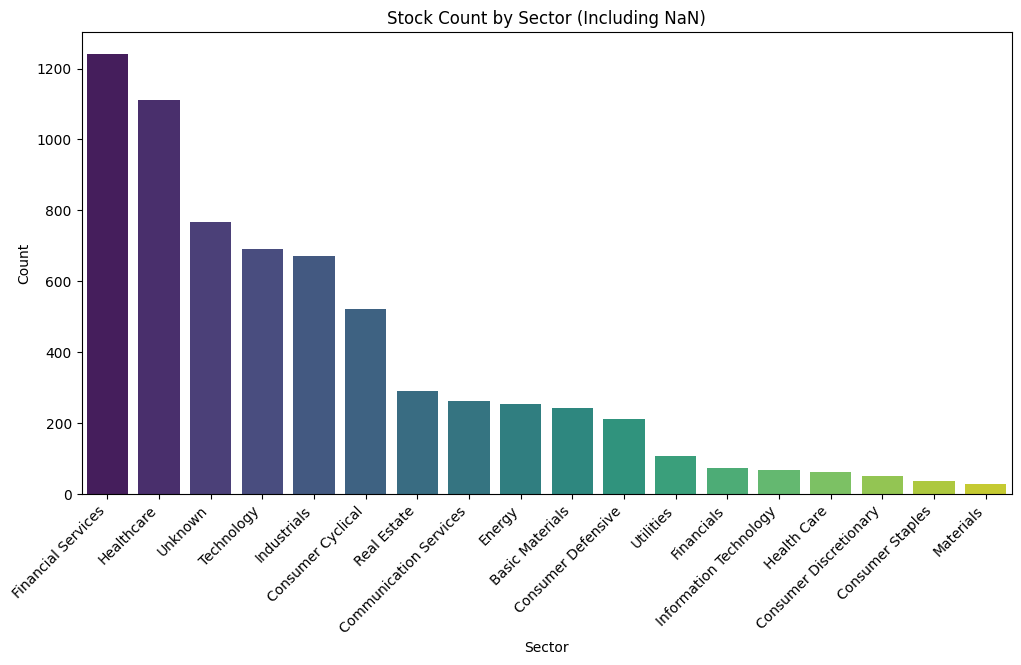

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
test_df = pd.read_csv('updated_all_stock_list.csv', encoding='utf-8-sig')

# NaN 값을 'Unknown'으로 변경 (NaN 값도 표시하기 위해)
test_df['Sector'] = test_df['Sector'].fillna('Unknown')

# Sector별 개수 세기
sector_counts = test_df['Sector'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis")

# 라벨 추가
plt.xticks(rotation=45, ha='right')
plt.xlabel("Sector")
plt.ylabel("Count")
plt.title("Stock Count by Sector (Including NaN)")
plt.show()
